In [1]:
import numpy as np 
import pandas as pd 
import re 
import nltk
import matplotlib.pyplot as plt
import string
import matplotlib
import json

In [2]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\shara\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [3]:
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')


## Total number of characters 

In [4]:
print('Total number of charaters in Roosevelt are',len(Roosevelt)) 
print('Total number of charaters in Kennedy are',len(Kennedy)) 
print('Total number of charaters in Nixon are',len(Nixon)) 


Total number of charaters in Roosevelt are 7571
Total number of charaters in Kennedy are 7618
Total number of charaters in Nixon are 9991


### Total number of words

In [5]:
tokens_Roosevelt = nltk.word_tokenize(Roosevelt)
print(('Number of words in Roosevelt are'),len(tokens_Roosevelt))
tokens_Kennedy = nltk.word_tokenize(Kennedy)
print(('Number of words in Kennedy are'),len(tokens_Kennedy)) 
tokens_Nixon = nltk.word_tokenize(Nixon)
print(('Number of words in Nixon are'),len(tokens_Nixon))  

Number of words in Roosevelt are 1526
Number of words in Kennedy are 1543
Number of words in Nixon are 2006


In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
Roosevelt_word = tokenizer.tokenize(Roosevelt)
print('Total number of words in Roosevelt without punctuation is',len(Roosevelt_word))
Kennedy_word = tokenizer.tokenize(Kennedy)
print('Total number of words in Kennedy without punctuation is',len(Kennedy_word))
Nixon_word = tokenizer.tokenize(Nixon)
print('Total number of words in Nixon without punctuation is',len(Nixon_word))


Total number of words in Roosevelt without punctuation is 1350
Total number of words in Kennedy without punctuation is 1370
Total number of words in Nixon without punctuation is 1819


In [7]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [8]:
Roosevelt_sentence = sent_tokenize(Roosevelt)
Kennedy_sentence = sent_tokenize(Kennedy)
Nixon_sentence = sent_tokenize(Nixon)

In [9]:
print('Total number of sentence in Roosevelt is',len(Roosevelt_sentence)) 
print('Total number of sentence in Kennedy is',len(Kennedy_sentence)) 
print('Total number of sentence in Nixon is',len(Nixon_sentence)) 

Total number of sentence in Roosevelt is 68
Total number of sentence in Kennedy is 52
Total number of sentence in Nixon is 68


In [10]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english') 

In [11]:
def myTokenizer(text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search ('[a-zA-Z]',token):
            tokens.append(token)
    ret_tokens = [stemmer.stem(t) for t in tokens]
    return ret_tokens

In [12]:
from nltk.stem.snowball import SnowballStemmer
Roosevelt_clean = myTokenizer(Roosevelt)
Kennedy_clean = myTokenizer(Kennedy)
Nixon_clean = myTokenizer(Nixon)

In [13]:
Roosevelt_clean = ' '.join(Roosevelt_clean)
Kennedy_clean = ' '.join(Kennedy_clean)
Nixon_clean = ' '.join(Nixon_clean)

In [14]:
Roosevelt_clean

"on each nation day of inaugur sinc the peopl have renew their sens of dedic to the unit state in washington 's day the task of the peopl was to creat and weld togeth a nation in lincoln 's day the task of the peopl was to preserv that nation from disrupt from within in this day the task of the peopl is to save that nation and it institut from disrupt from without to us there has come a time in the midst of swift happen to paus for a moment and take stock to recal what our place in histori has been and to rediscov what we are and what we may be if we do not we risk the real peril of inact live of nation are determin not by the count of year but by the lifetim of the human spirit the life of a man is three-scor year and ten a littl more a littl less the life of a nation is the full of the measur of it will to live there are men who doubt this there are men who believ that democraci as a form of govern and a frame of life is limit or measur by a kind of mystic and artifici fate that for 

In [15]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
stop_words = nltk.corpus.stopwords.words('english') +list(string.punctuation)
  
word_tokens = word_tokenize(Roosevelt_clean)  
Rooseveltfiltered_sentence = [w for w in word_tokens if not w in stop_words]  
Rooseveltfiltered_sentence = []  
  
for w in word_tokens:  
    if w not in stop_words:  
        Rooseveltfiltered_sentence.append(w)  
  
print(word_tokens)  
print(Rooseveltfiltered_sentence)  

['on', 'each', 'nation', 'day', 'of', 'inaugur', 'sinc', 'the', 'peopl', 'have', 'renew', 'their', 'sens', 'of', 'dedic', 'to', 'the', 'unit', 'state', 'in', 'washington', "'s", 'day', 'the', 'task', 'of', 'the', 'peopl', 'was', 'to', 'creat', 'and', 'weld', 'togeth', 'a', 'nation', 'in', 'lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'peopl', 'was', 'to', 'preserv', 'that', 'nation', 'from', 'disrupt', 'from', 'within', 'in', 'this', 'day', 'the', 'task', 'of', 'the', 'peopl', 'is', 'to', 'save', 'that', 'nation', 'and', 'it', 'institut', 'from', 'disrupt', 'from', 'without', 'to', 'us', 'there', 'has', 'come', 'a', 'time', 'in', 'the', 'midst', 'of', 'swift', 'happen', 'to', 'paus', 'for', 'a', 'moment', 'and', 'take', 'stock', 'to', 'recal', 'what', 'our', 'place', 'in', 'histori', 'has', 'been', 'and', 'to', 'rediscov', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', 'if', 'we', 'do', 'not', 'we', 'risk', 'the', 'real', 'peril', 'of', 'inact', 'live', 'of', 'nation', 'a

In [16]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
stop_words = set(stopwords.words('english'))  
word_tokens = word_tokenize(Kennedy_clean)  
Kennedyfiltered_sentence = [w for w in word_tokens if not w in stop_words]  
Kennedyfiltered_sentence = []  
  
for w in word_tokens:  
    if w not in stop_words:  
        Kennedyfiltered_sentence.append(w)  
  
print(word_tokens)  
print(Kennedyfiltered_sentence)  

['vice', 'presid', 'johnson', 'mr.', 'speaker', 'mr.', 'chief', 'justic', 'presid', 'eisenhow', 'vice', 'presid', 'nixon', 'presid', 'truman', 'reverend', 'clergi', 'fellow', 'citizen', 'we', 'observ', 'today', 'not', 'a', 'victori', 'of', 'parti', 'but', 'a', 'celebr', 'of', 'freedom', 'symbol', 'an', 'end', 'as', 'well', 'as', 'a', 'begin', 'signifi', 'renew', 'as', 'well', 'as', 'chang', 'for', 'i', 'have', 'sworn', 'i', 'befor', 'you', 'and', 'almighti', 'god', 'the', 'same', 'solemn', 'oath', 'our', 'forebear', 'l', 'prescrib', 'near', 'a', 'centuri', 'and', 'three', 'quarter', 'ago', 'the', 'world', 'is', 'veri', 'differ', 'now', 'for', 'man', 'hold', 'in', 'his', 'mortal', 'hand', 'the', 'power', 'to', 'abolish', 'all', 'form', 'of', 'human', 'poverti', 'and', 'all', 'form', 'of', 'human', 'life', 'and', 'yet', 'the', 'same', 'revolutionari', 'belief', 'for', 'which', 'our', 'forebear', 'fought', 'are', 'still', 'at', 'issu', 'around', 'the', 'globe', 'the', 'belief', 'that', 't

In [17]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
stop_words = set(stopwords.words('english'))  
word_tokens = word_tokenize(Nixon_clean)  
Nixonfiltered_sentence = [w for w in word_tokens if not w in stop_words]  
Nixonfiltered_sentence = []  
  
for w in word_tokens:  
    if w not in stop_words:  
        Nixonfiltered_sentence.append(w)  
  
print(word_tokens)  
print(Nixonfiltered_sentence)  

['mr.', 'vice', 'presid', 'mr.', 'speaker', 'mr.', 'chief', 'justic', 'senat', 'cook', 'mrs.', 'eisenhow', 'and', 'my', 'fellow', 'citizen', 'of', 'this', 'great', 'and', 'good', 'countri', 'we', 'share', 'togeth', 'when', 'we', 'met', 'here', 'four', 'year', 'ago', 'america', 'was', 'bleak', 'in', 'spirit', 'depress', 'by', 'the', 'prospect', 'of', 'seem', 'endless', 'war', 'abroad', 'and', 'of', 'destruct', 'conflict', 'at', 'home', 'as', 'we', 'meet', 'here', 'today', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peac', 'in', 'the', 'world', 'the', 'central', 'question', 'befor', 'us', 'is', 'how', 'shall', 'we', 'use', 'that', 'peac', 'let', 'us', 'resolv', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'period', 'have', 'so', 'often', 'been', 'a', 'time', 'of', 'retreat', 'and', 'isol', 'that', 'lead', 'to', 'stagnat', 'at', 'home', 'and', 'invit', 'new', 'danger', 'abroad', 'let', 'us', 'reso

In [18]:
Roosevelt_most_commonwords = nltk.FreqDist(Rooseveltfiltered_sentence).most_common(3)
Roosevelt_most_commonwords

[('nation', 17), ('know', 10), ('peopl', 9)]

In [19]:
Kennedy_most_commonwords = nltk.FreqDist(Kennedyfiltered_sentence).most_common(3)
Kennedy_most_commonwords

[('let', 16), ('us', 12), ('power', 9)]

In [20]:
Nixon_most_commonwords = nltk.FreqDist(Nixonfiltered_sentence).most_common(3)
Nixon_most_commonwords

[('us', 26), ('let', 22), ('america', 21)]

In [21]:
Rooseveltfiltered_sentence = ' '.join(Rooseveltfiltered_sentence)
Kennedyfiltered_sentence = ' '.join(Kennedyfiltered_sentence)
Nixonfiltered_sentence = ' '.join(Nixonfiltered_sentence)


Word Cloud for Roosevelt (after cleaning)!!


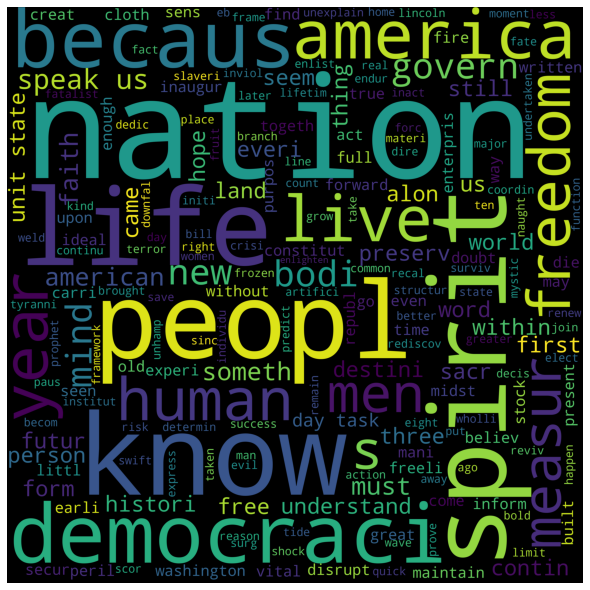

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Rooseveltfiltered_sentence) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt (after cleaning)!!")
plt.show()

Word Cloud for Kennedy (after cleaning)!!


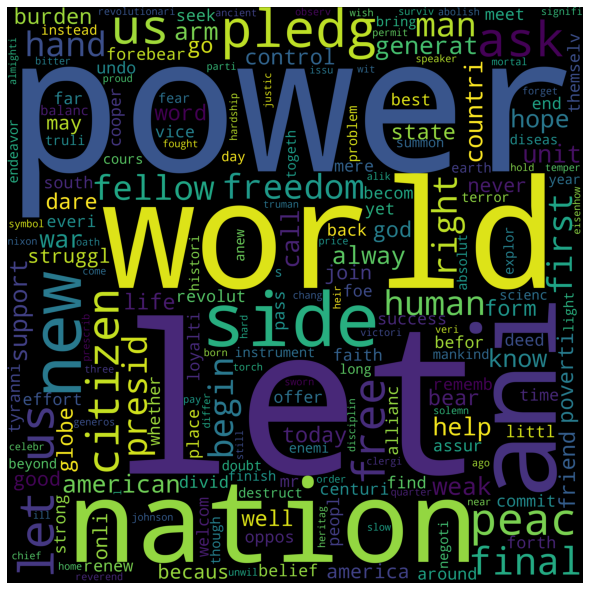

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Kennedyfiltered_sentence) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy (after cleaning)!!")
plt.show()

Word Cloud for Nixon (after cleaning)!!


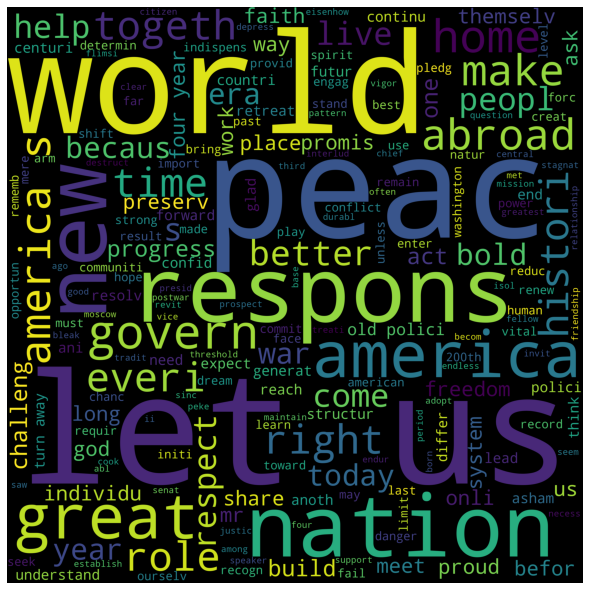

In [24]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Nixonfiltered_sentence) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon (after cleaning)!!")
plt.show()